In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#importing data
df=pd.read_csv('job-market.csv')

<AxesSubplot:xlabel='count', ylabel='Location'>

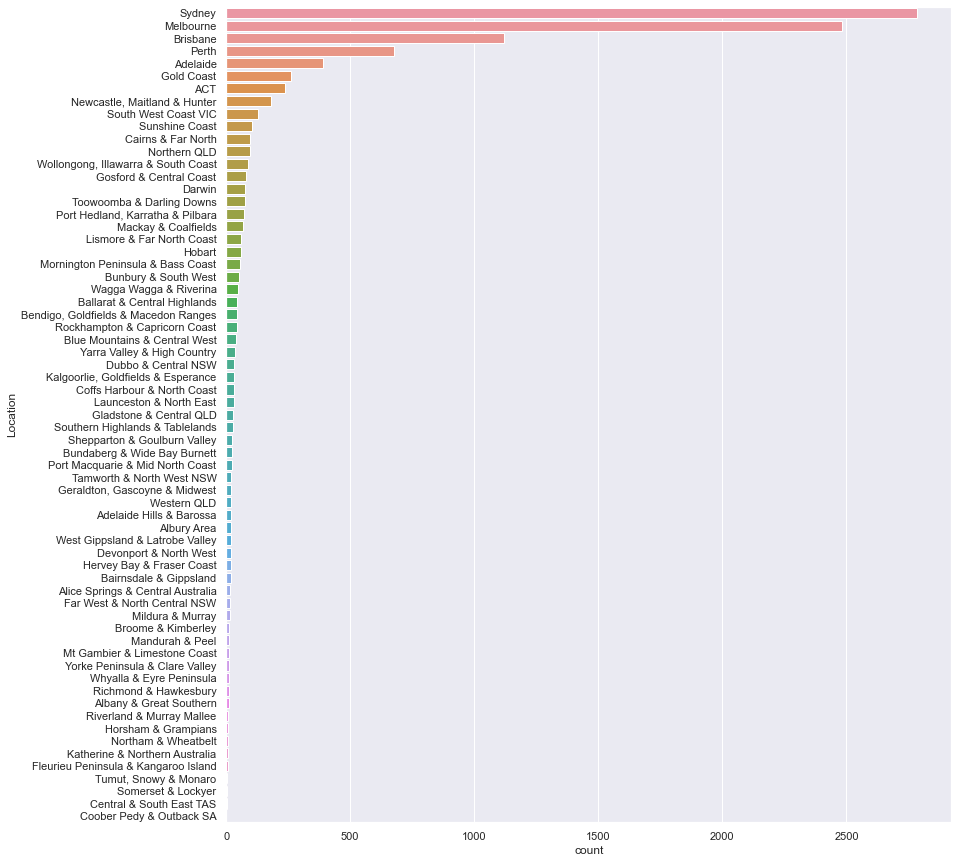

In [3]:
#plotting job by location
sns.set(rc={'figure.figsize':(13,15)})
sns.countplot(y='Location',data=df,order = df['Location'].value_counts().index)

In [4]:
# making new column with salary ranges
def joinString(x,y):
    return(str(x)+"-"+str(y))
df['newcol']=df.apply(lambda x : joinString(x['LowestSalary'], x['HighestSalary']), axis = 1)

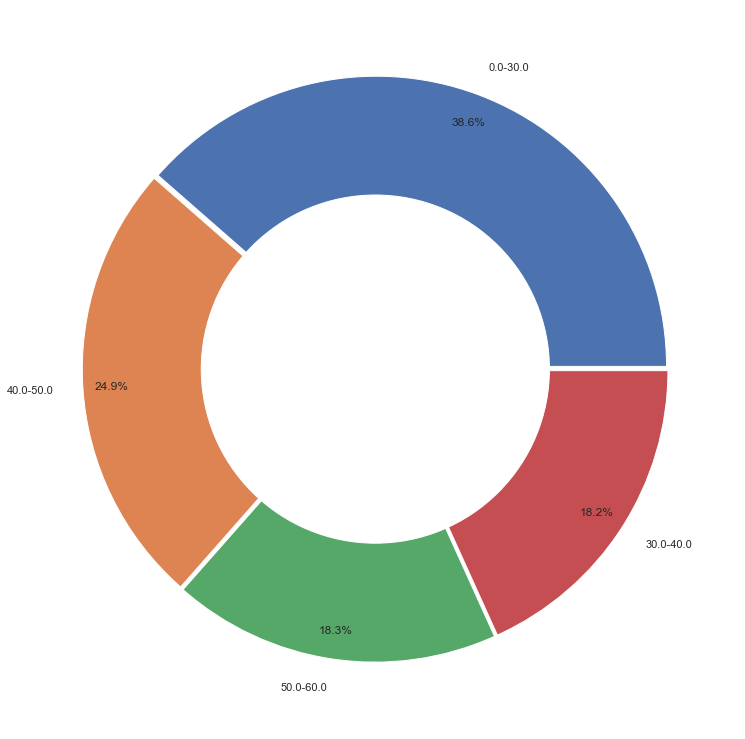

In [5]:
#DONUT CHART
plt.pie(df['newcol'].value_counts()[1:], labels=df['newcol'].value_counts().index[1:],
        autopct='%1.1f%%', pctdistance=0.90,explode=[0.01,0.01,0.01,0.01])
# adding white circle in between pie chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [6]:
wine=pd.read_csv("wine.data.csv")

In [7]:
label=wine["Label"]
wine = wine.drop('Label', 1)

C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_7628/679353876.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wine = wine.drop('Label', 1)


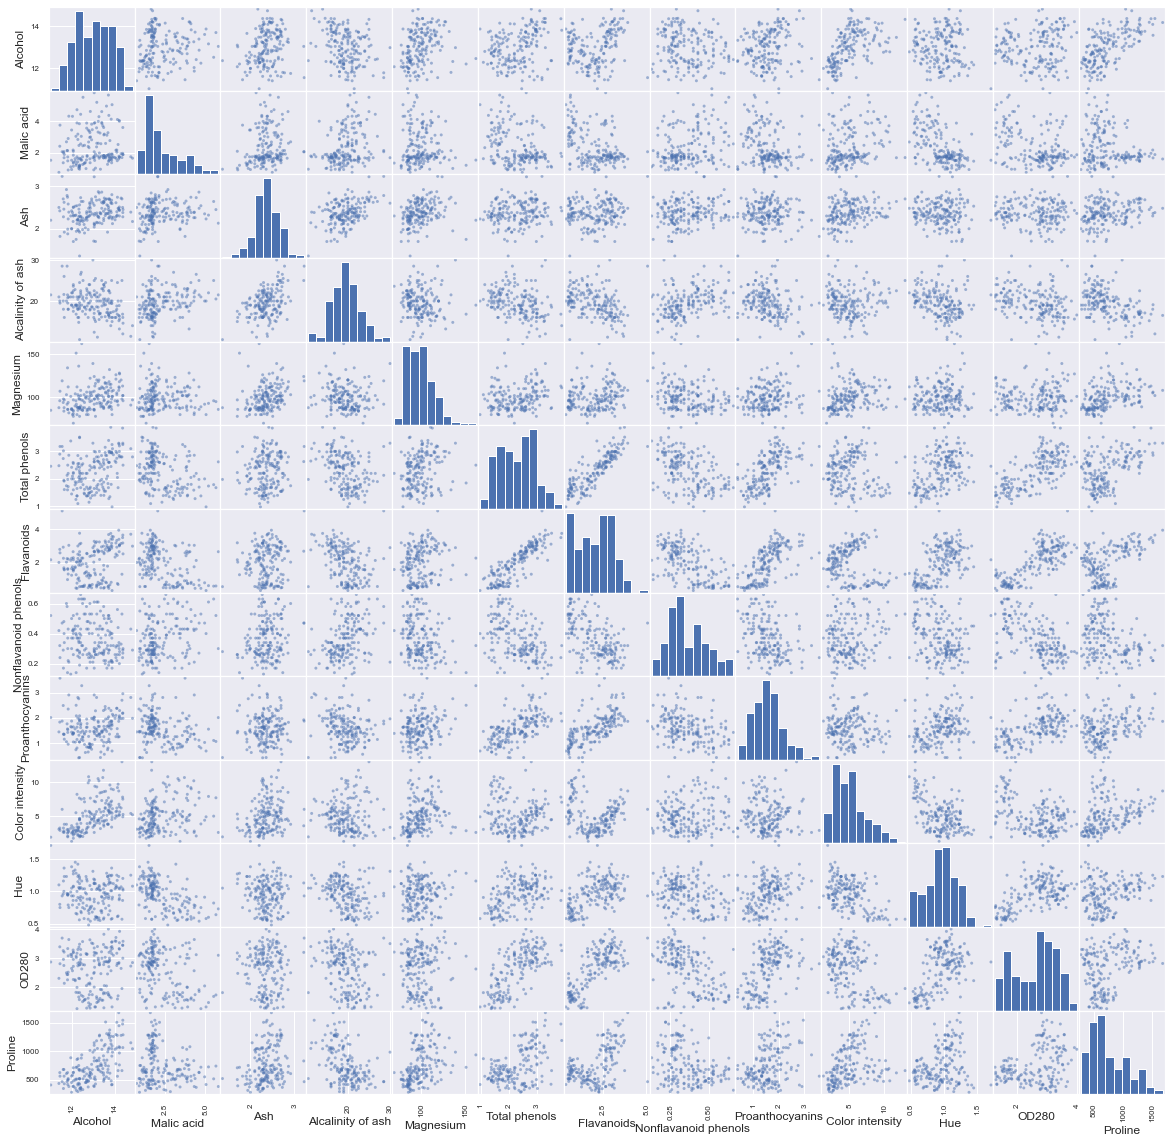

In [8]:
#Scatter plot
pd.plotting.scatter_matrix(wine,figsize=(20,20));

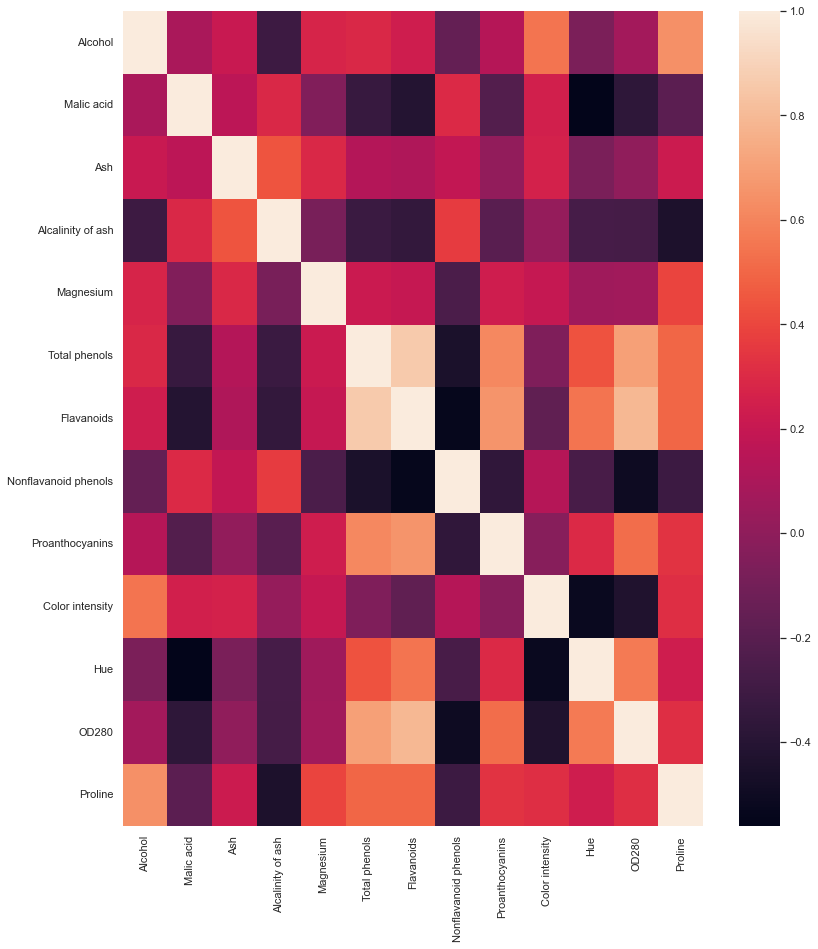

In [10]:
sns.heatmap(wine.corr());

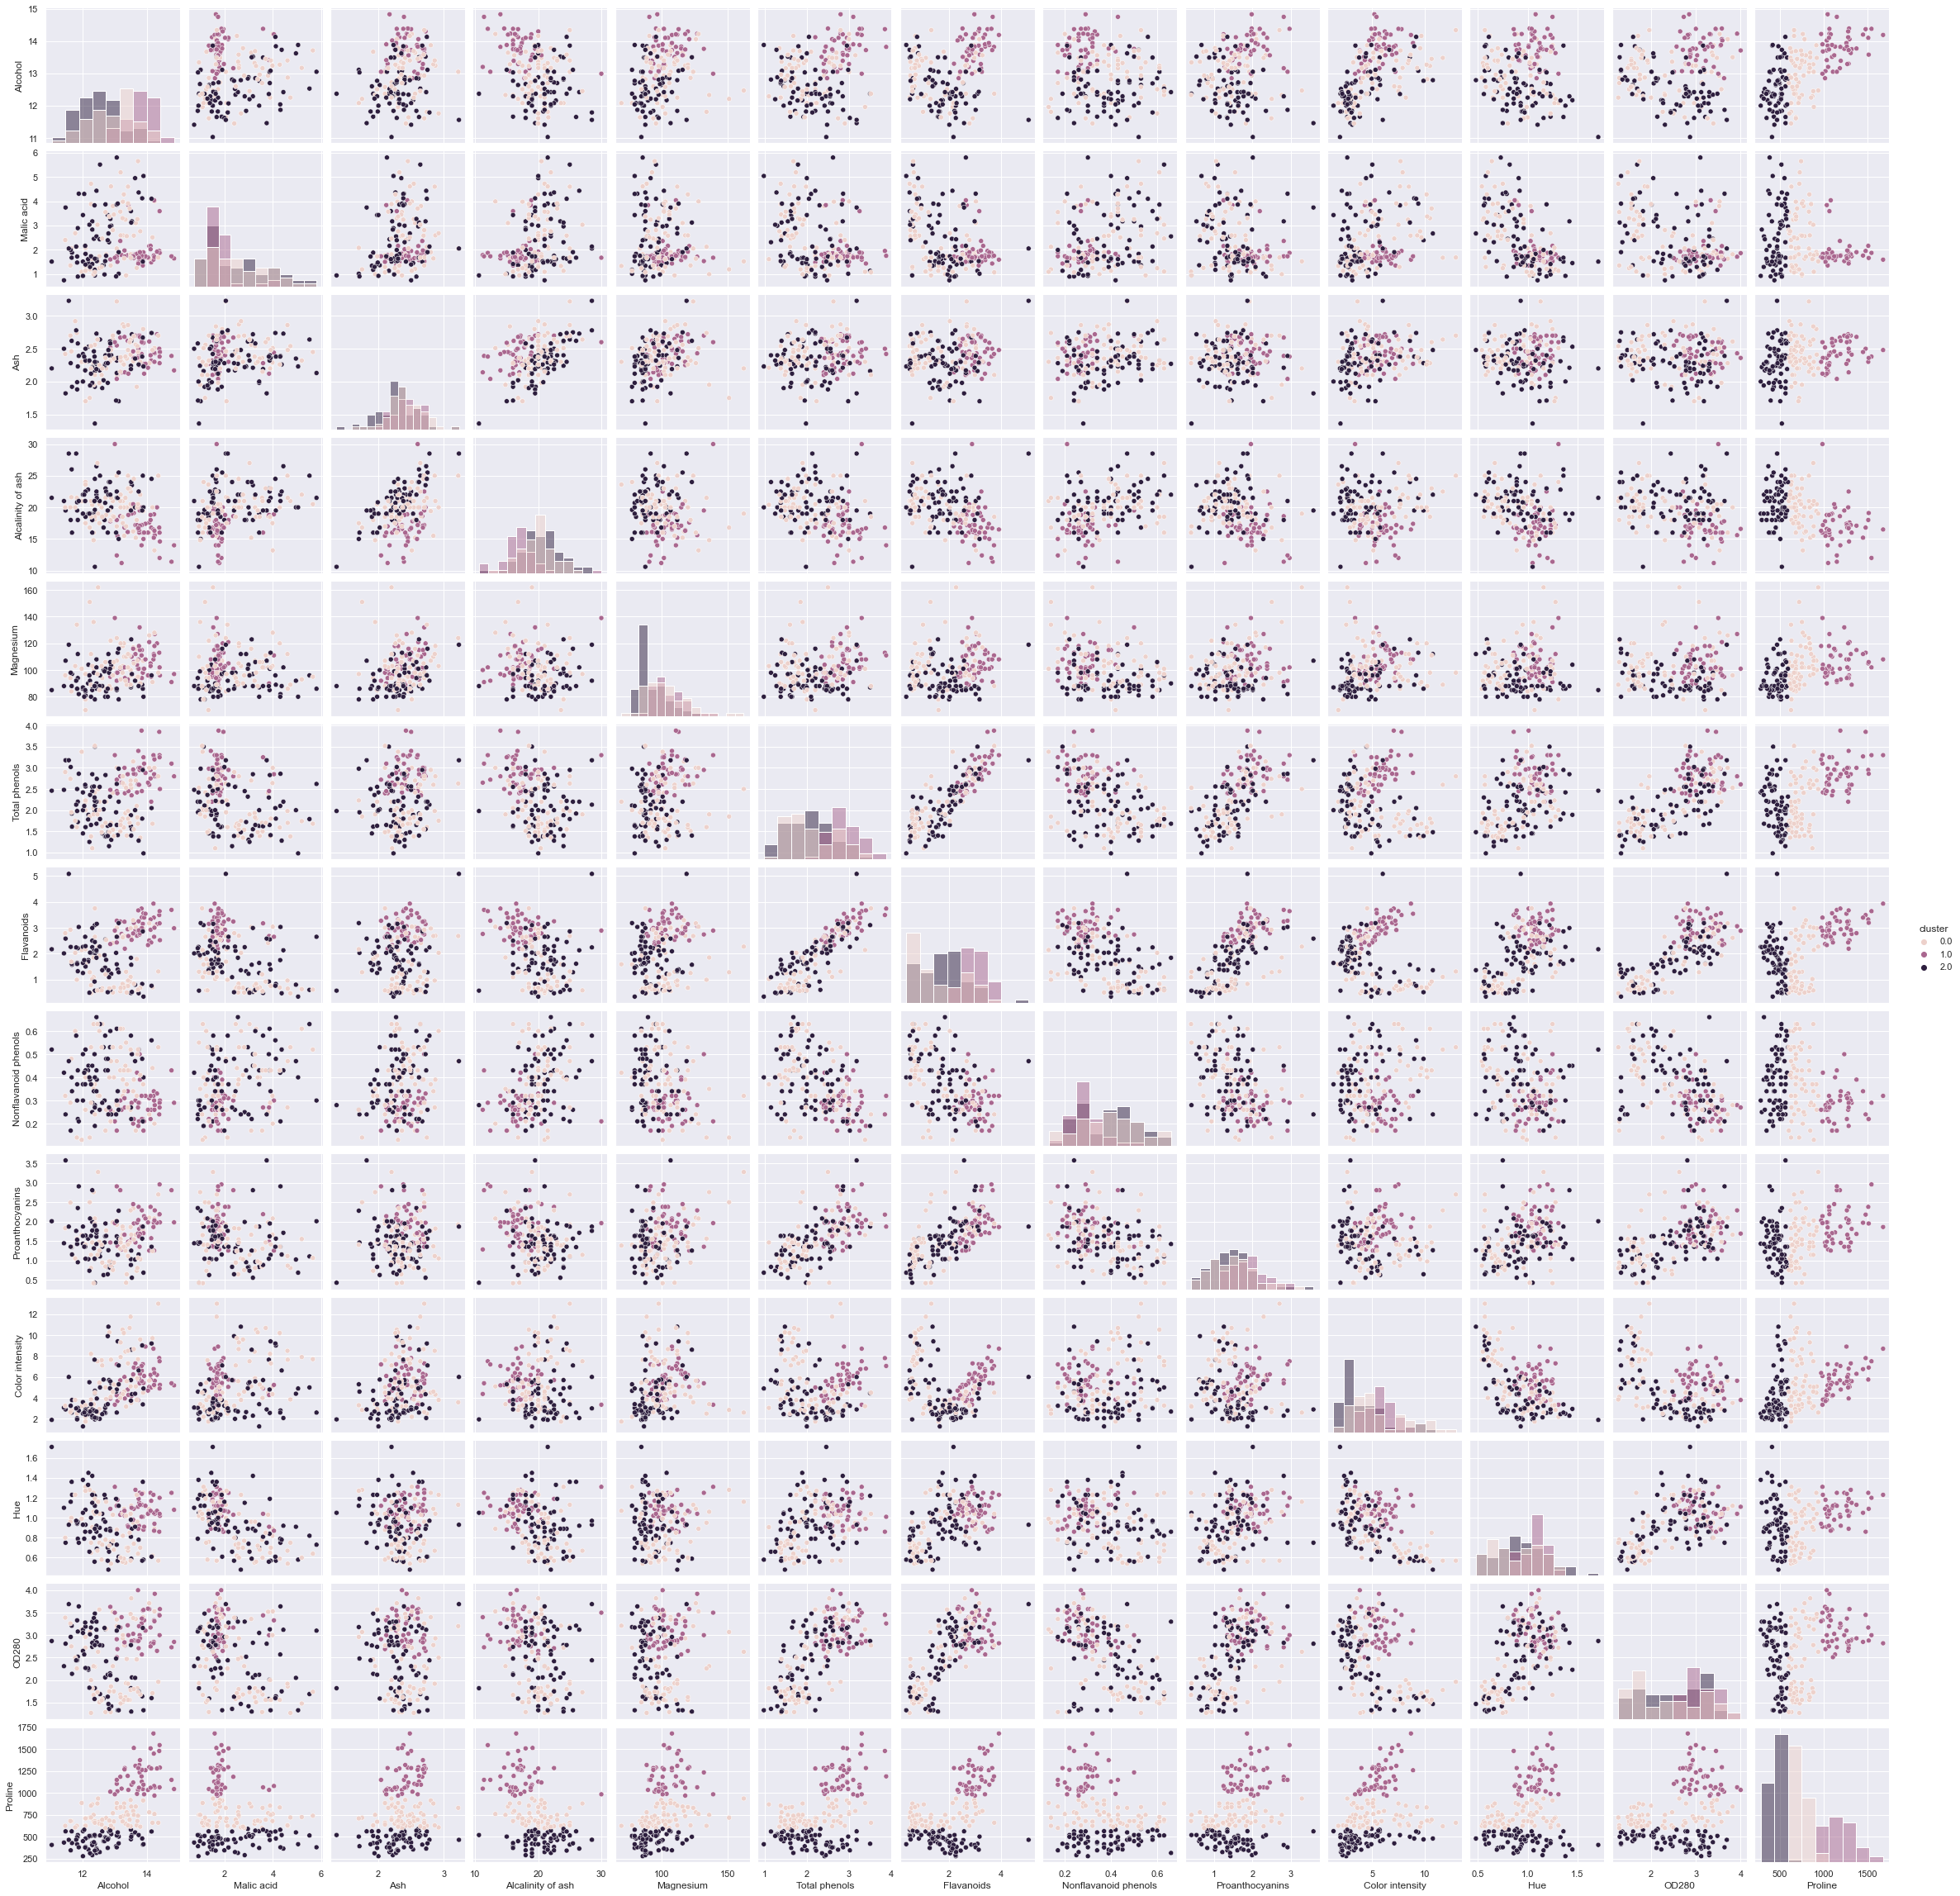

In [14]:
#Kmeans
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
prediction = kMeansClustering.fit_predict(wine)
wine["cluster"] = prediction.astype('float64')
sns_plot = sns.pairplot(wine, hue = "cluster",diag_kind="hist")

C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_7628/2580620450.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wine=wine.drop('cluster',1)


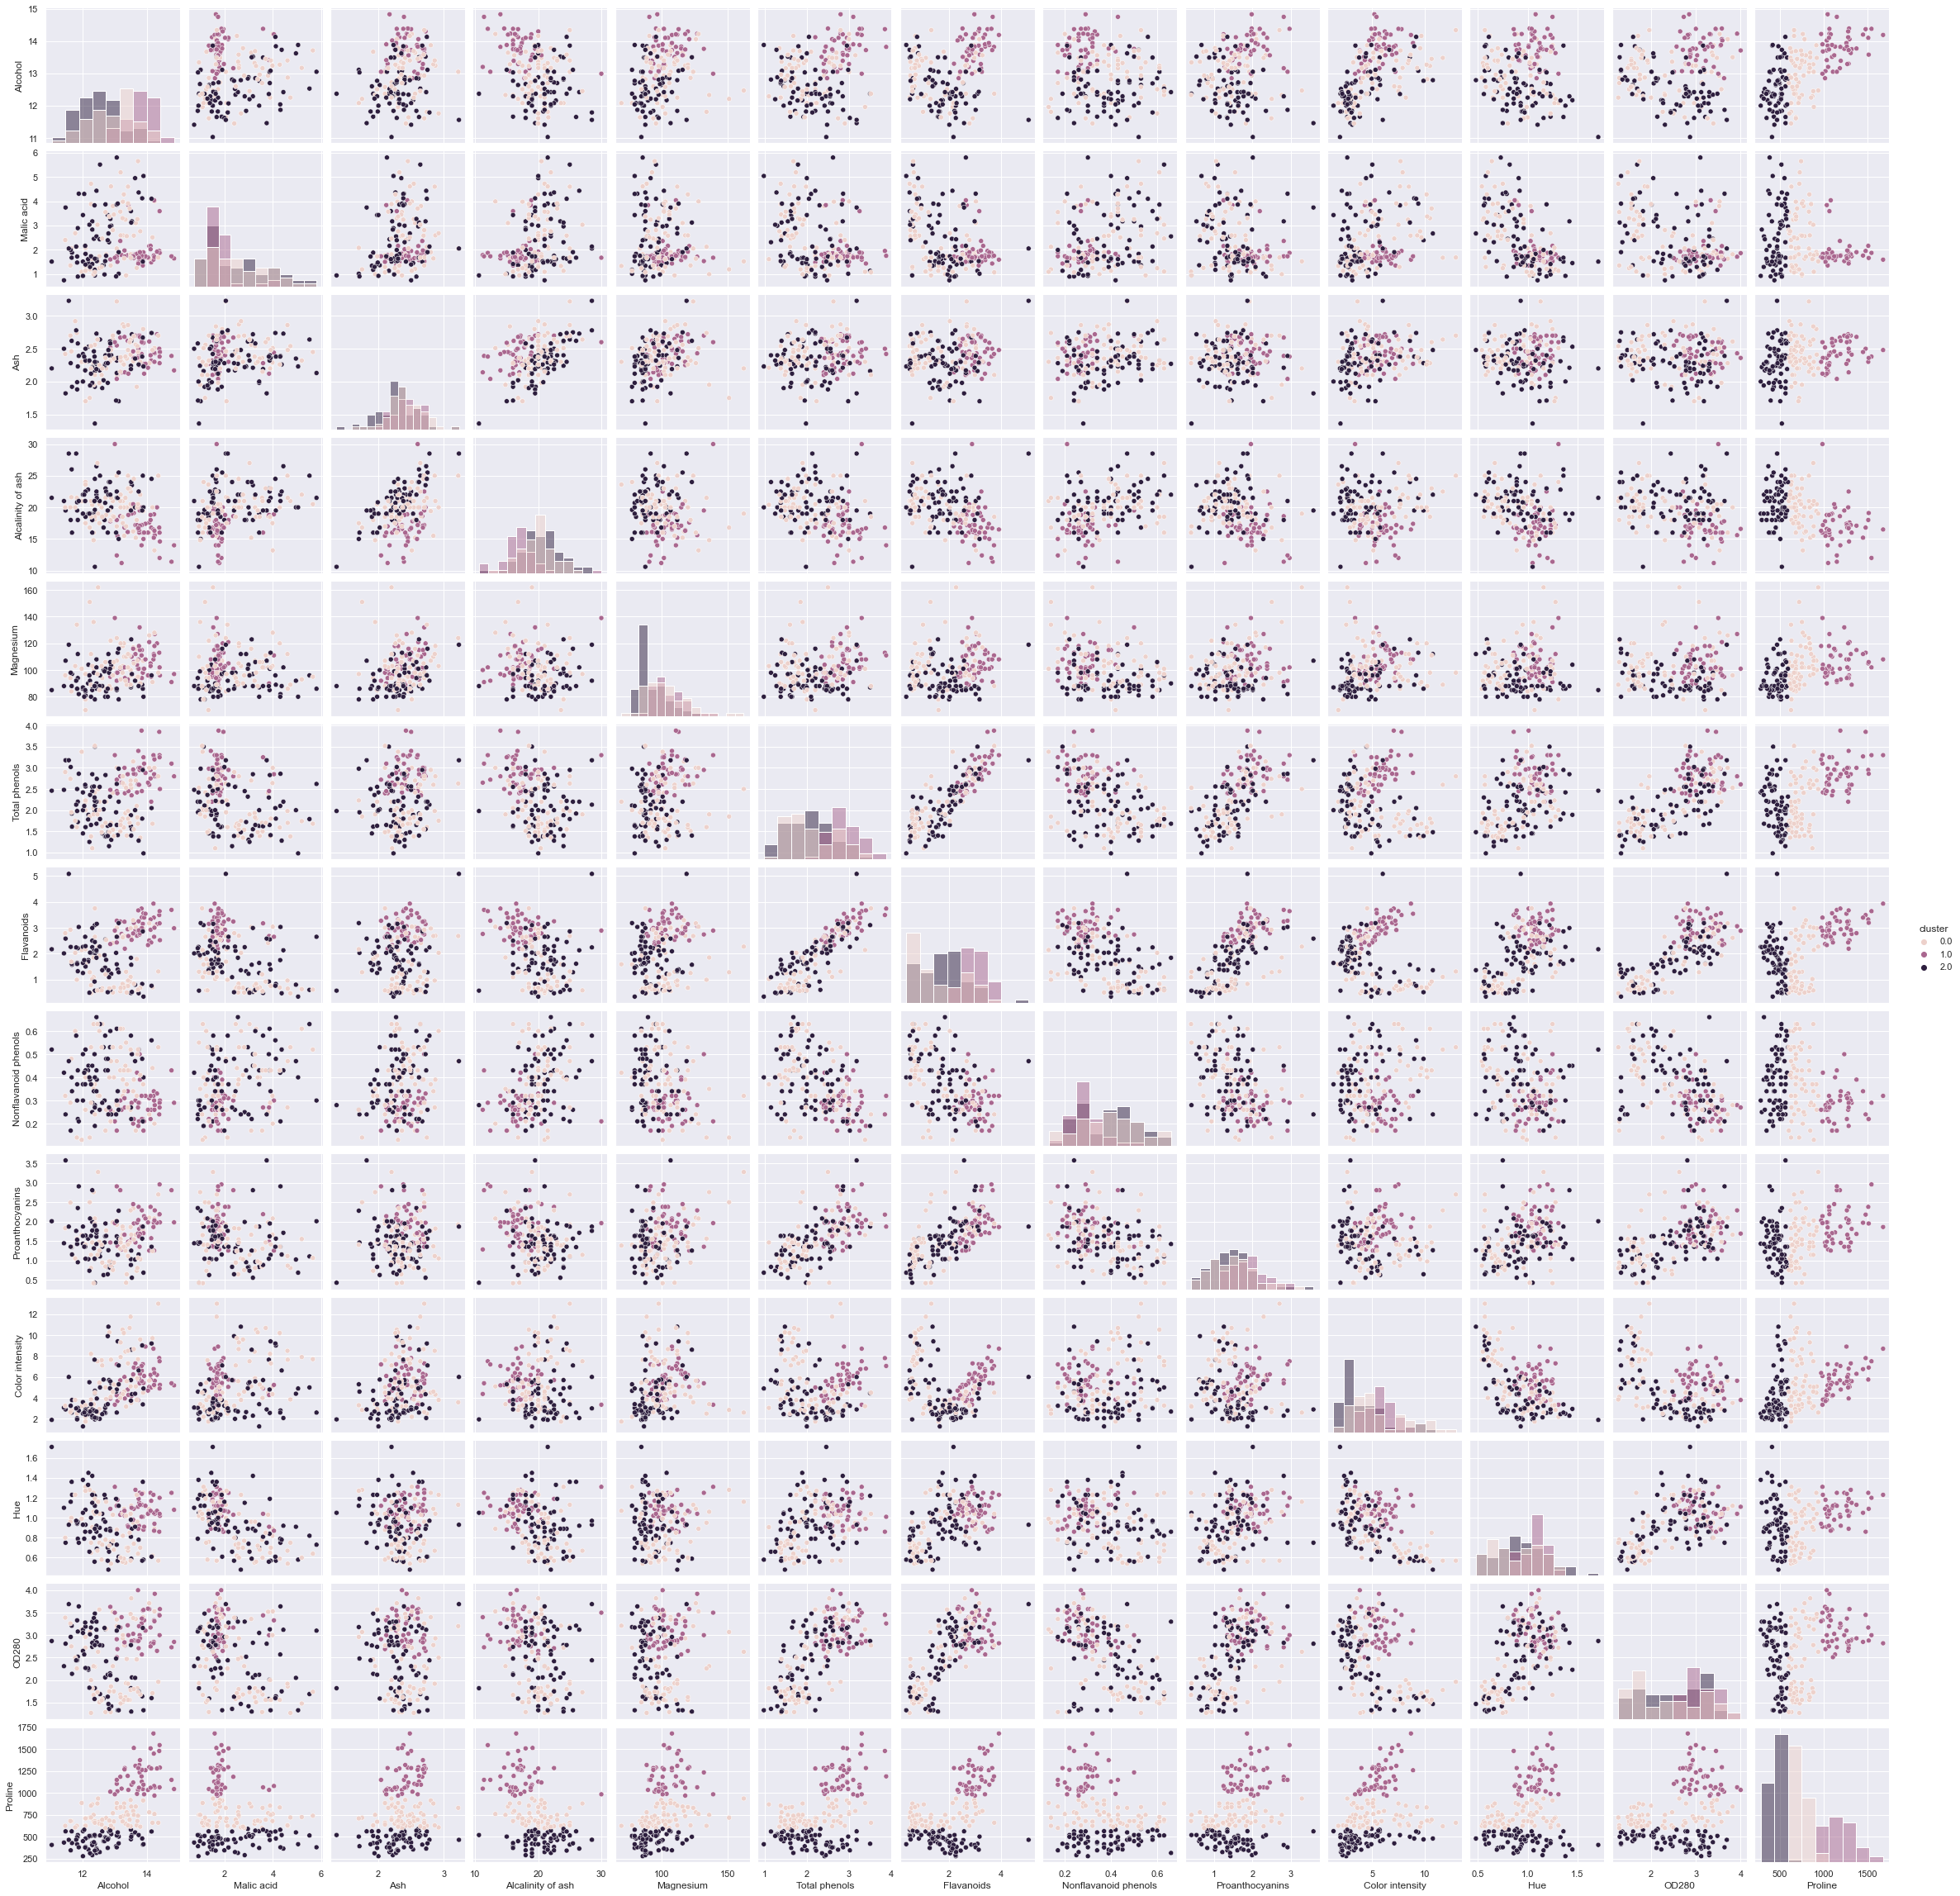

In [15]:
wine=wine.drop('cluster',1)
#kmeans with standardScaler
standardScaler = StandardScaler()
standardScaler.fit(wine);
X_scaled_array = standardScaler.transform(wine)
normalizedData = pd.DataFrame(X_scaled_array, columns = wine.columns)

kMeansClustering = KMeans(n_clusters = 3, random_state=0)
prediction = kMeansClustering.fit_predict(wine)
wine["cluster"] = prediction.astype('float64')
sns_plot = sns.pairplot(wine, hue = "cluster",diag_kind="hist")